In [36]:
NAME = "Michael Cornelisse"
STUDENT_NUMBER = "s1059020"
COLLABORATOR_NAME = "Nienke Helmers"
COLLABORATOR_STUDENT_NUMBER = "s1016904"

In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Source

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import plot_tree

In [38]:
y = pd.read_csv('../data/archive/actual.csv')
train = pd.read_csv('../data/archive/data_set_ALL_AML_train.csv')
test = pd.read_csv('../data/archive/data_set_ALL_AML_independent.csv')
y.head()
train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [39]:
# Drop the call collumns from both data sets
call_cols_train = [col for col in train.columns if 'call' in col]
train = train.drop(call_cols_train, axis = 1)

call_cols_test = [col for col in test.columns if 'call' in col]
test = test.drop(call_cols_test, axis = 1)

In [40]:
'''
train = train.T
test = test.T
train.head()
# Clean up the column names for training data
train.columns = train.iloc[1]
train = train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

# Clean up the column names for training data
test.columns = test.iloc[1]
test = test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

train.index = pd.to_numeric(train.index) 
test.index = pd.to_numeric(test.index) 
train.sort_index(inplace=True) 
test.sort_index(inplace=True)

test
'''

'\ntrain = train.T\ntest = test.T\ntrain.head()\n# Clean up the column names for training data\ntrain.columns = train.iloc[1]\ntrain = train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)\n\n# Clean up the column names for training data\ntest.columns = test.iloc[1]\ntest = test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)\n\ntrain.index = pd.to_numeric(train.index) \ntest.index = pd.to_numeric(test.index) \ntrain.sort_index(inplace=True) \ntest.sort_index(inplace=True)\n\ntest\n'

In [41]:
# Drop "Gene Description" and "Gene Accession Number"
cols_to_drop = ['Gene Description', 'Gene Accession Number']
train = train.drop(cols_to_drop, axis = 1)
test = test.drop(cols_to_drop, axis = 1)

# Transpose both data_sets
train = train.T
test = test.T

train.index = pd.to_numeric(train.index) 
test.index = pd.to_numeric(test.index) 
train.sort_index(inplace=True) 
test.sort_index(inplace=True)
train

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25
6,-138,-85,215,71,-272,-558,67,-186,87,193,...,115,1221,-76,172,-74,645,341,26,193,-53
7,-72,-144,238,55,-399,-551,131,-179,126,-20,...,30,819,-178,151,-18,1140,482,10,369,-42
8,-413,-260,7,-2,-541,-790,-275,-463,70,-169,...,289,629,-86,302,23,1799,446,59,781,20
9,5,-127,106,268,-210,-535,0,-174,24,506,...,356,980,6,177,-12,758,385,115,244,-39
10,-88,-105,42,219,-178,-246,328,-148,177,183,...,42,986,26,101,21,570,359,9,171,7


In [42]:
y['cancer'].value_counts() 

ALL    47
AML    25
Name: cancer, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: AML || 1: ALL)')

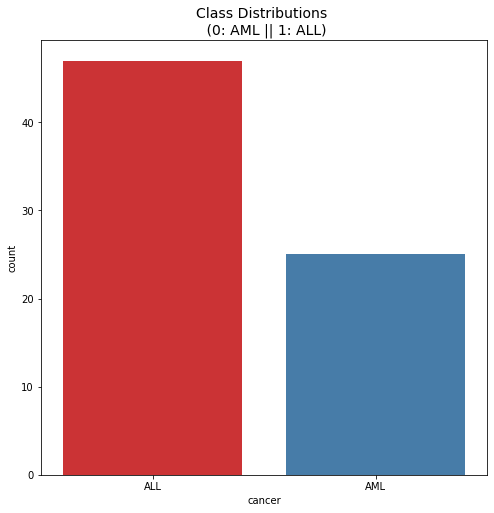

In [43]:
plt.figure(figsize=(8,8))
colors = ["AML", "ALL"]
sns.countplot('cancer', data=y, palette = "Set1")
plt.title('Class Distributions \n (0: AML || 1: ALL)', fontsize=14)

In [44]:
y = y.replace({'ALL':0,'AML':1})

In [45]:
# Split the data sets into X_train, X_test, y_training, y_test all separated 
#X_train = train.reset_index(drop=True)
#X_train.index = pd.to_numeric(train.index) 
#X_train.index = pd.to_numeric(range(1, 39))
#X_train.sort_index(inplace=True) 
#y_train = y[y.patient <= 38].reset_index(drop=True) 
#X_test = test.reset_index(drop=True)
#X_test.index = pd.to_numeric(test.index) 
#X_test.sort_index(inplace=True) 
#y_test= y[y.patient > 38].reset_index(drop=True)

#X_train

In [46]:
# Split the data sets into X_train, X_test, y_training, y_test all separated 
X_train = train.reset_index(drop=True)
y_train = y[y.patient <= 38].reset_index(drop=True) 
print(len(y_train))
X_test = test.reset_index(drop=True)
y_test= y[y.patient > 38].reset_index(drop=True)


38


In [47]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

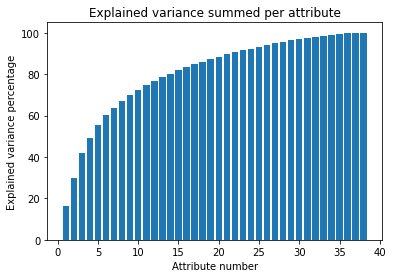

Figure: A plot of the explained variance. The variance is summed for all attributes up to and including
the current attribute number,for examplethe tenth attribute shows the sum of attributes 1 to 10.
There are 21 attributes that together explain 90% of the variance.


In [48]:
pca_variance_ratio = pca.explained_variance_ratio_.cumsum()
pca_variance_percentage = pca_variance_ratio*100
#Calculate and plot explained variance PCA
pca_variance_ratio = pca.explained_variance_ratio_.cumsum()
pca_variance_percentage = pca_variance_ratio * 100
plt.bar(range(1,pca_variance_percentage.size+1), pca_variance_percentage)
plt.title("Explained variance summed per attribute")
plt.xlabel("Attribute number")
plt.ylabel("Explained variance percentage")
plt.show()
print('''Figure: A plot of the explained variance. The variance is summed for all attributes up to and including
the current attribute number,for examplethe tenth attribute shows the sum of attributes 1 to 10.''')

#Determine number of attributes needed for an explained variance of 90%
pca_variance_cropped = [i for i in pca_variance_percentage if i < 90]
no_attributes = len(pca_variance_cropped)
print("There are {} attributes that together explain 90% of the variance." .format(no_attributes))

In [49]:
y_test = y_test.iloc[:,1].values
y_train = y_train.iloc[:,1].values 

In [50]:
tree_clf = tree.DecisionTreeClassifier(criterion='gini', max_depth = 4)
tree_clf = tree_clf.fit(X_train_pca, y_train)
prediction=tree_clf.predict(X_test_pca)


acc_decision_tree = metrics.accuracy_score(prediction,y_test)

accuracy = metrics.accuracy_score(prediction, y_test)
print("The standard decision tree has an accuracy of {} and an error rate of {}.".format(accuracy, 1-accuracy))

The standard decision tree has an accuracy of 0.7352941176470589 and an error rate of 0.2647058823529411.


In [51]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
0,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
1,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
2,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18
3,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
4,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,341,91,-84,615,-52,1235,9,7,1545,-81
5,-146,-74,170,174,-32,-318,8,-152,-148,17,...,180,690,-142,249,-220,354,-42,-100,45,-108
6,-187,-187,312,142,114,-148,-184,-133,12,97,...,37,125,-185,13,-148,304,-1,-207,112,-190
7,-56,-43,43,177,-116,-184,-105,-62,0,-40,...,103,593,0,-24,18,625,173,63,63,-62
8,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,174,277,6,81,2,722,170,0,510,-73
9,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,233,643,51,450,-46,612,370,29,333,-19


In [52]:
# Split the data sets into X_train, X_test, y_training, y_test and then combine (X_train, y_train), (X_test, y_test)
X_train1 = train.reset_index(drop=True)
y_train1 = y[y.patient <= 38].reset_index(drop=True)

X_train1 = pd.concat([y_train1, X_train1], axis=1)

X_test1 = test.reset_index(drop=True)
y_test1= y[y.patient > 38].reset_index(drop=True)

X_test1 = pd.concat([y_test1, X_test1], axis=1)

In [53]:
sample = X_train1.iloc[:,2:].sample(n=100, axis=1)
sample["cancer"] = X_train1.cancer
sample.describe().round()

,2500,3650,2283,2023,3313,6445,1060,2842,1150,3020,...,5343,819,2170,4441,5550,2989,4883,5214,4408,cancer
count,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,...,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0
mean,2187.0,-17.0,36.0,575.0,15920.0,379.0,543.0,91.0,-13.0,60.0,...,-201.0,169.0,369.0,136.0,-15.0,986.0,-31.0,-125.0,24.0,0.0
std,1511.0,52.0,175.0,230.0,3985.0,250.0,154.0,254.0,77.0,94.0,...,175.0,152.0,182.0,173.0,37.0,488.0,63.0,86.0,451.0,0.0
min,311.0,-129.0,-166.0,11.0,7021.0,-38.0,212.0,-294.0,-220.0,-78.0,...,-676.0,-273.0,47.0,-132.0,-79.0,430.0,-139.0,-389.0,-362.0,0.0
25%,1169.0,-50.0,-90.0,437.0,13501.0,196.0,442.0,-86.0,-56.0,0.0,...,-337.0,85.0,257.0,40.0,-32.0,748.0,-91.0,-185.0,-183.0,0.0
50%,1738.0,-4.0,-8.0,602.0,15710.0,340.0,514.0,34.0,-14.0,50.0,...,-134.0,160.0,320.0,108.0,-19.0,912.0,-22.0,-112.0,-134.0,0.0
75%,2763.0,16.0,82.0,709.0,19156.0,542.0,645.0,260.0,16.0,102.0,...,-72.0,255.0,457.0,216.0,1.0,1018.0,22.0,-66.0,6.0,1.0
max,7193.0,69.0,550.0,1224.0,22819.0,1120.0,913.0,809.0,150.0,387.0,...,77.0,643.0,942.0,896.0,127.0,3124.0,103.0,22.0,1544.0,1.0


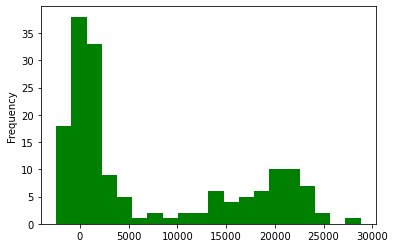

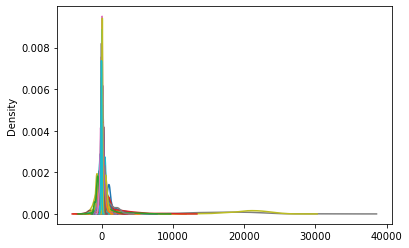

In [31]:
sample = sample.drop("cancer", axis=1)
sample.plot(kind="hist", legend=None, bins=20, color='g')
sample.plot(kind="kde", legend=None);

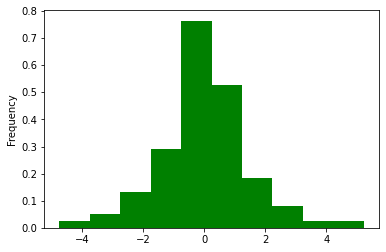

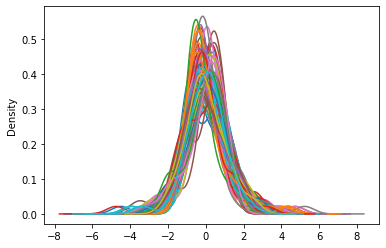

In [32]:
sample_scaled = pd.DataFrame(preprocessing.scale(sample))
sample_scaled.plot(kind="hist",density=True, legend=None, bins=10, color='g')
sample_scaled.plot(kind="kde", legend=None);

In [33]:
# Now standardize the whole data set
scaler= StandardScaler() 
X_test = scaler.fit_transform(X_test) 
X_train = scaler.fit_transform(X_train)



In [34]:
X_train.shape

(38, 7129)

In [35]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)